# **AMES Housing Price Prediction**

---------------


## **Objective**

The objective of this project is to build a machine learning-based housing price prediction model. The Ames data set presents a modern substitute for the renowned Boston Housing data set, offering a clear predictor variable of house sale prices. This data set offers a chance to assess the efficiency of different modeling techniques for regression models. 



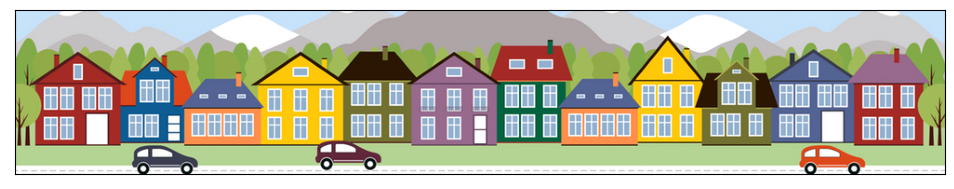

In [1]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

credit_card_image=np.array(mpimg.imread('ames.png'))
fig, ax=plt.subplots(figsize=(12,12))
                          
ax.imshow(credit_card_image)
ax.set(xticks=[],yticks=[])   
plt.show()    

## **Dataset**
Dean De Cock of Truman State University is the primary custodian of the housing data set. (Cock 2011) summarizes the data set as containing 2930 observations on 80 predictor variables (23 nominal, 23 ordinal, 14 discrete, and 20 continuous). These were used in the valuation of homes in Ames Iowa during the period 2006 until 2010. Here, we are working with features ['Overall Qual', 'Overall Cond', 'Gr Liv Area', 'Central Air', 'Total Bsmt SF', 'SalePrice']. 


## **Data Description**

Features used:


* Overall Qual (Ordinal): Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
* Overall Cond (Ordinal): Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor


* Gr Liv Area (Continuous): Above grade (ground) living area square feet

* Central Air (Nominal): Central air conditioning

       N	No
       Y	Yes
       
* Total Bsmt SF (Continuous): Total square feet of basement area

* SalePrice: the property's sale price in dollars. This is the target variable that we are trying to predict.


## **Goal** 

Our goal is to build a regression model that can accurately predict the sale price of a house based on the features listed above.

## **Choice between sales price prediction or model interpretability**

When it comes to selecting the optimal model in machine learning, the choice largely depends on the intended objective. For instance, if the primary aim is to predict the sale price of a house, a simple linear model would be sufficient. However, to enhance the accuracy of the outlier predictions, one may opt for a stacked model that combines ridge regression and XGBoost, even if it sacrifices model interpretability.

Nevertheless, predicting the sale price of a house is not always the ultimate goal. In fact, identifying the factors that influence the selling price may be more valuable than the predictions themselves, especially from the seller's perspective. Hence, to improve model interpretability, a XGBoost model or a random forest model (with better tuning) could be better alternatives.




In [2]:
# Importing the basic libraries we will require for the project

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# Code to ignore warnings from function usage
import warnings;
warnings.filterwarnings('ignore')


## **Loading the dataset**

In [3]:
import pandas as pd

columns = ['Overall Qual', 'Overall Cond', 'Gr Liv Area',
           'Central Air', 'Total Bsmt SF', 'SalePrice']

df = pd.read_csv('http://jse.amstat.org/v19n3/decock/AmesHousing.txt', 
                 sep='\t',
                 usecols=columns)



## **Overview of the dataset**

### **View the first and last 5 rows of the dataset**

Let's **view the first few rows and last few rows** of the dataset in order to understand its structure a little better.

We will use the head() and tail() methods from Pandas to do this.

In [4]:
df.head()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,Y,1656,215000
1,5,6,882.0,Y,896,105000
2,6,6,1329.0,Y,1329,172000
3,7,5,2110.0,Y,2110,244000
4,5,5,928.0,Y,1629,189900


In [5]:
df.tail()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
2925,6,6,1003.0,Y,1003,142500
2926,5,5,864.0,Y,902,131000
2927,5,5,912.0,Y,970,132000
2928,5,5,1389.0,Y,1389,170000
2929,7,5,996.0,Y,2000,188000


### **Understand the shape of the dataset**

In [6]:
df.shape

(2930, 6)

#### The dataset has 2930 rows and 6 columns. 

### **Check the data types of the columns for the dataset**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Overall Qual   2930 non-null   int64  
 1   Overall Cond   2930 non-null   int64  
 2   Total Bsmt SF  2929 non-null   float64
 3   Central Air    2930 non-null   object 
 4   Gr Liv Area    2930 non-null   int64  
 5   SalePrice      2930 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 137.5+ KB


All the columns are numbers except Central Air  which is string

### **Check the percentage of missing values in each column**

In [8]:
df.isnull().any()

Overall Qual     False
Overall Cond     False
Total Bsmt SF     True
Central Air      False
Gr Liv Area      False
SalePrice        False
dtype: bool

Total Bsmt SF has missing value.

In [9]:
pd.DataFrame(data={'% of Missing Values':round(df.isna().sum()/df.isna().count()*100,2)}).sort_values(by='% of Missing Values',ascending=False)

,% of Missing Values
Total Bsmt SF,0.03
Overall Qual,0.00
Overall Cond,0.00
Central Air,0.00
Gr Liv Area,0.00
SalePrice,0.00


In [10]:
df.isnull().sum().sum()

1

In [11]:
filter_df = df['Total Bsmt SF'].isnull()
df.loc[filter_df,:] 

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
1341,4,7,NaN,Y,896,79000


### Imputation for completing missing values using k-Nearest Neighbors.

Each sample’s missing values are imputed using the mean value from n_neighbors nearest neighbors found in the dataset set. 
The parameter 'n_neighbors' is set to 5, which means that the imputer will use the 5 nearest neighbors to impute missing values.

In [12]:
# Create an instance of the KNNImputer class
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Impute the missing values in the Total Bsmt SF column
df['Total Bsmt SF'] = imputer.fit_transform(df[['Total Bsmt SF']])



In [13]:
# Print the imputed value 
df.loc[filter_df,:]

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
1341,4,7,1051.614544,Y,896,79000


### **Check the number of unique values in each column**

In [14]:
df.nunique()

Overall Qual       10
Overall Cond        9
Total Bsmt SF    1059
Central Air         2
Gr Liv Area      1292
SalePrice        1032
dtype: int64

## **Exploratory Data Analysis**

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Overall Qual,2930.0,6.094881,1.411026,1.0,5.0,6.0,7.00,10.0
Overall Cond,2930.0,5.563140,1.111537,1.0,5.0,5.0,6.00,9.0
Total Bsmt SF,2930.0,1051.614544,440.539845,0.0,793.0,990.0,1301.50,6110.0
Gr Liv Area,2930.0,1499.690444,505.508887,334.0,1126.0,1442.0,1742.75,5642.0
SalePrice,2930.0,180796.060068,79886.692357,12789.0,129500.0,160000.0,213500.00,755000.0


* The mean Overall Qual and Overall Cond are slightly above average, with the highest rating being 10 & 9 and the lowest being 1. 
* The mean Total Bsmt SF and Gr Liv Area are 1051.61 and 1499.69 square feet, respectively, with the highest value being 6,110 and 5,642 square feet, respectively. 
* The lowest value for Total Bsmt SF is 0 implying that some houses don't have Basement.
* The mean SalePrice is USD 180,796.06, with the highest price being USD 755,000 and the lowest being USD 12,789. 

### Univariate Analysis

In [16]:
# Check normal distribution of all numerical features
import scipy.stats as stats
test_normality = lambda x: stats.shapiro(x.fillna(0))[1] < 0.01
normal = pd.DataFrame(df[['Overall Qual', 'Overall Cond', 'Gr Liv Area', 'Total Bsmt SF', 'SalePrice']])
normal = normal.apply(test_normality)
print(not normal.any())

False


Applied Shapiro–Wilk test to all the numerical features to check whether they follow a normal distribution or not. As the result is False means none of the numerical features follow the normal distribution.

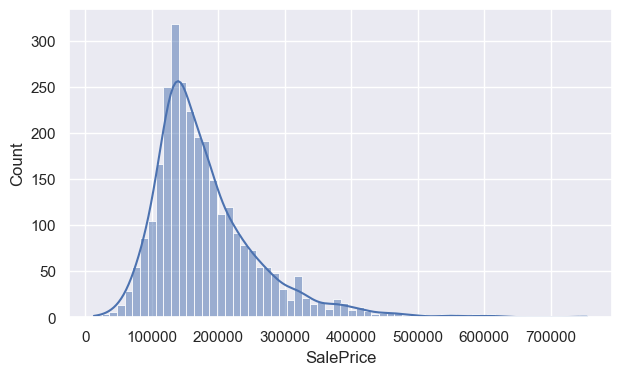

In [17]:
# Plotting the target variable Sales Price to look at the distribution

plt.figure(figsize = (7, 4))
sns.histplot(data = df['SalePrice'], kde = True)
plt.show()

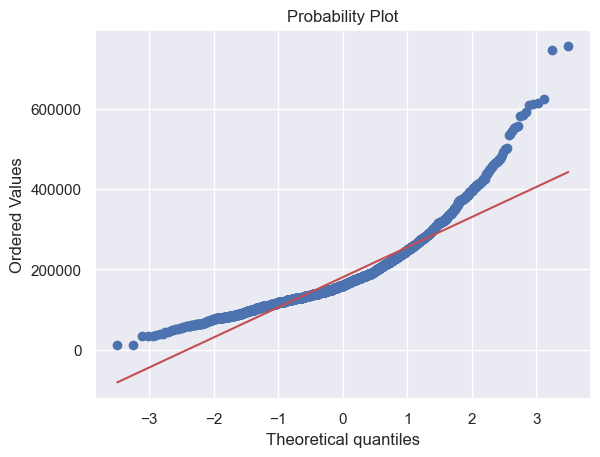

In [18]:
result = stats.probplot(df['SalePrice'], plot=plt)

In [19]:
#skewness and kurtosis
print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())

Skewness: 1.743500
Kurtosis: 5.118900


* The distribution plot was used to assess the distribution of the data, while the normal probability plot was used to ascertain whether 'SalePrice' adheres to a normal distribution.

* Skewness, which is a measure of the symmetry of a dataset, was also examined. A perfectly symmetrical dataset would have a skewness of 0, and a normal distribution would have a skewness of 0 as well. 

* The kurtosis of the normal distribution, which is equivalent to 3, is frequently compared to the value. If the kurtosis is higher than 3, the dataset has heavier tails than a normal distribution, and if it is lower than 3, the dataset has lighter tails than a normal distribution.

Sale price is heavily right-skewed also Kurtosis > 3 show heavier tails than a normal distribution; so need a log transformation to correct skewness

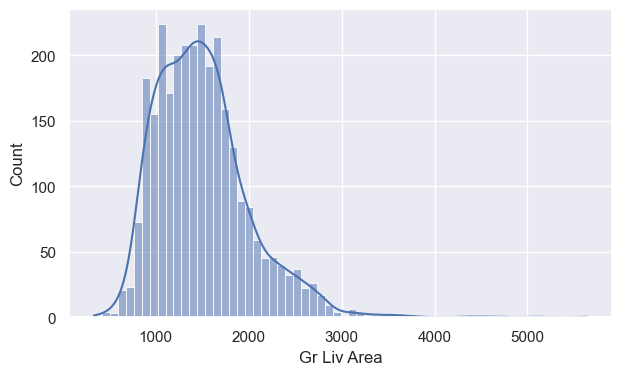

In [20]:
# Plotting Gr Liv Area
plt.figure(figsize = (7, 4))
sns.histplot(data = df['Gr Liv Area'], kde = True)
plt.show()

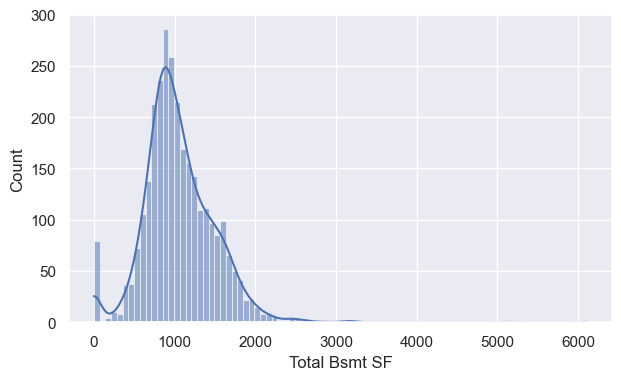

In [21]:
# Plotting Total Bsmt SF
plt.figure(figsize = (7, 4))
sns.histplot(data = df['Total Bsmt SF'], kde = True)
plt.show()

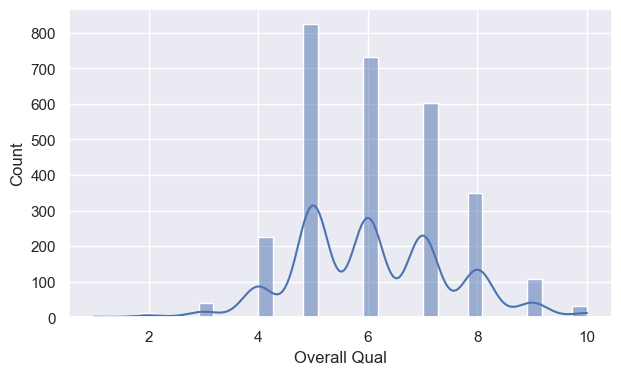

In [22]:
# Plotting Overall Quality
plt.figure(figsize = (7, 4))
sns.histplot(data = df['Overall Qual'], kde = True)
plt.show()

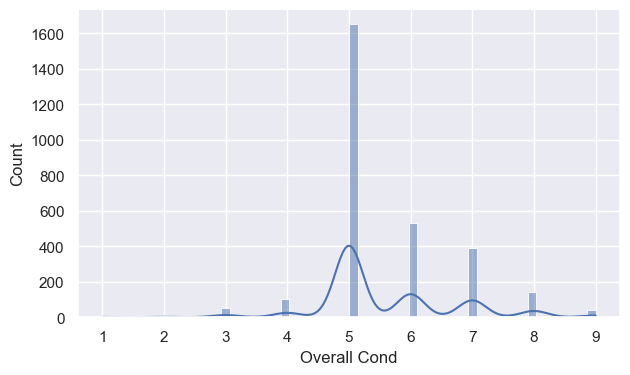

In [23]:
# Plotting Overall Cond
plt.figure(figsize = (7, 4))
sns.histplot(data = df['Overall Cond'], kde = True)
plt.show()

### Bivariate Analysis

### Using Seaborn regplot() : This method is used to plot data and a linear regression model fit.

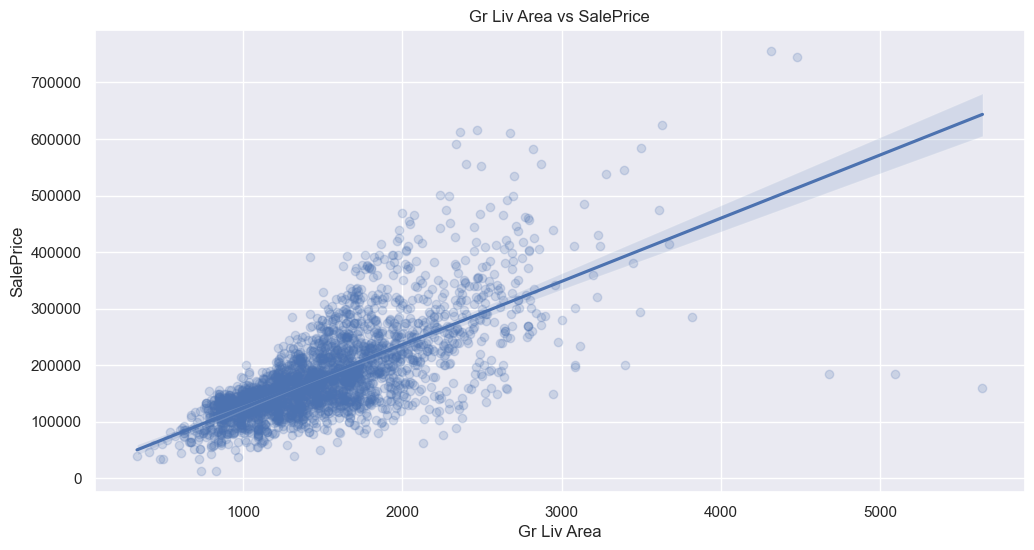

In [24]:
# regplot Gr Liv Area/saleprice
plt.figure(figsize = (12,6))
sns.regplot(data=df, x = 'Gr Liv Area', y='SalePrice', scatter_kws={'alpha':0.2})
plt.title('Gr Liv Area vs SalePrice', fontsize = 12)

plt.show()

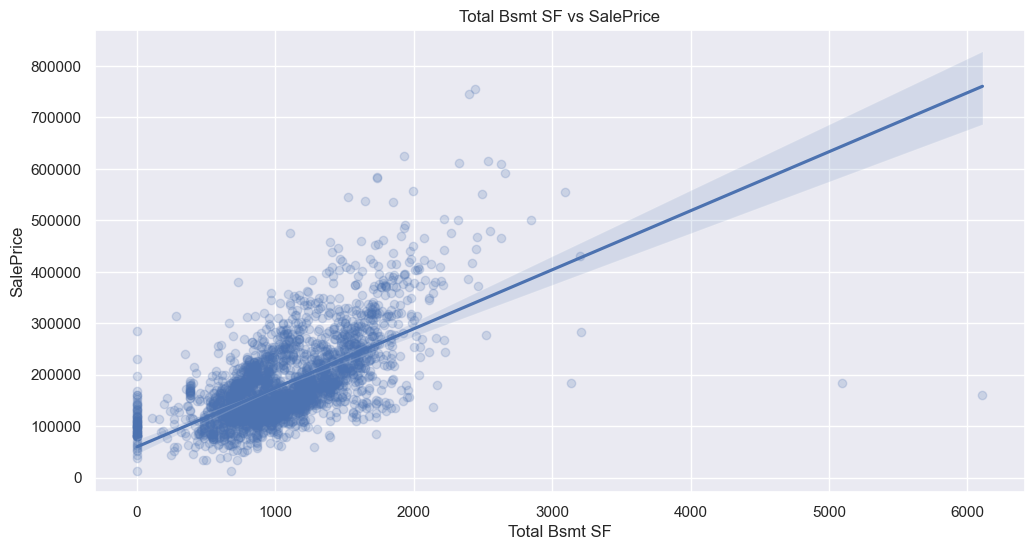

In [25]:
# regplot Total Bsmt SF/saleprice
plt.figure(figsize = (12,6))
sns.regplot(data=df, x = 'Total Bsmt SF', y='SalePrice', scatter_kws={'alpha':0.2})
plt.title('Total Bsmt SF vs SalePrice', fontsize = 12)

plt.show()

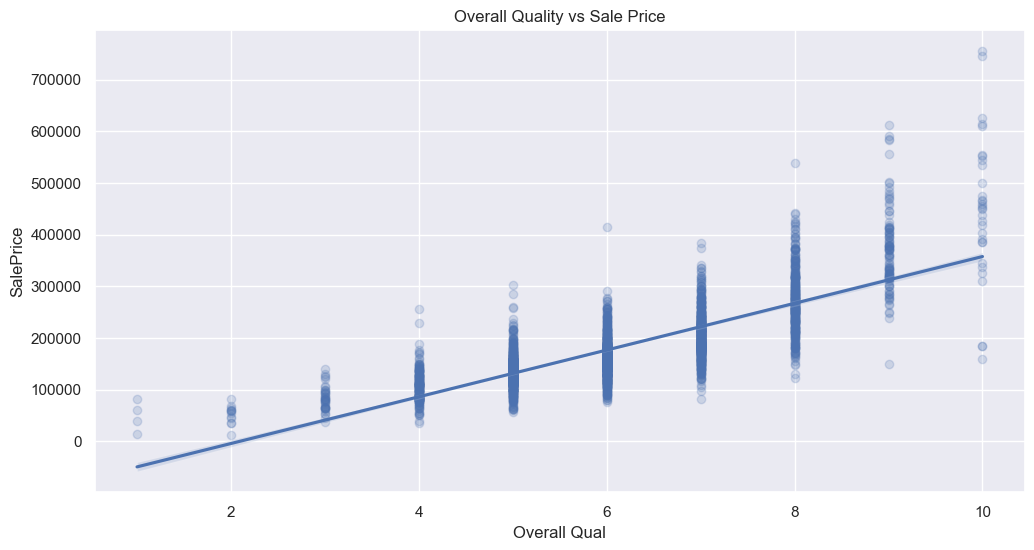

In [26]:
# regplot overallquality/saleprice

plt.figure(figsize = (12,6))
sns.regplot(data=df, x = 'Overall Qual', y='SalePrice', scatter_kws={'alpha':0.2})
plt.title('Overall Quality vs Sale Price', fontsize = 12)

plt.show()

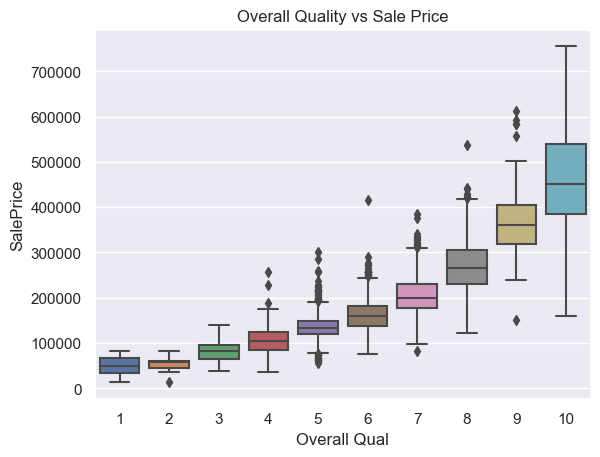

In [27]:
#box plot overallqual/saleprice
sns.boxplot(data=df, x = 'Overall Qual', y='SalePrice')
plt.title('Overall Quality vs Sale Price', fontsize = 12)
plt.show()

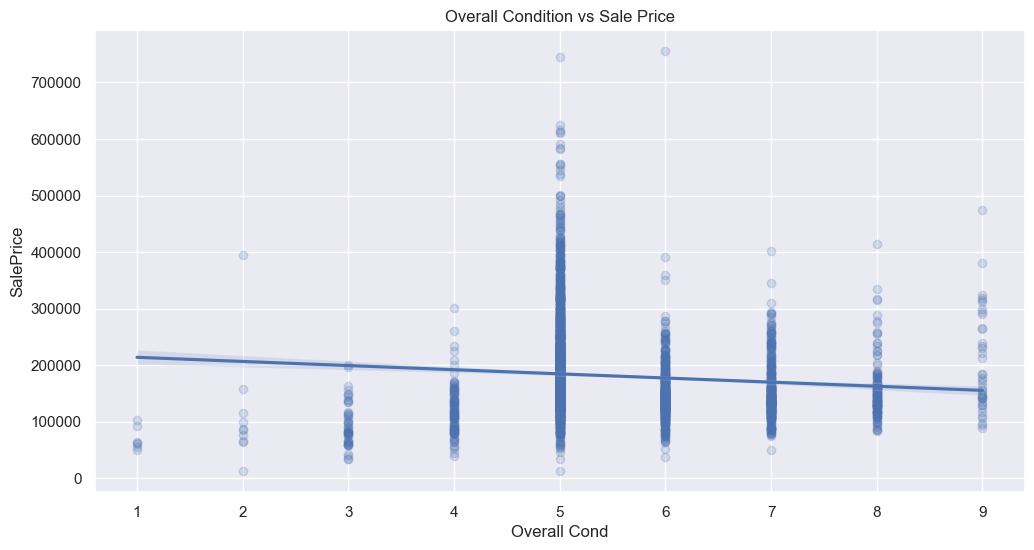

In [28]:
# regplot overallcondition/saleprice
plt.figure(figsize = (12,6))
sns.regplot(data=df, x = 'Overall Cond', y='SalePrice', scatter_kws={'alpha':0.2})
plt.title('Overall Condition vs Sale Price', fontsize = 12)

plt.show()

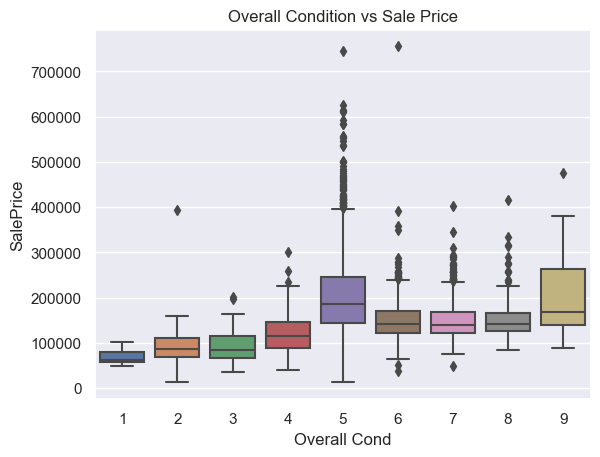

In [29]:
#box plot overallcondition/saleprice
sns.boxplot(data=df, x = 'Overall Cond', y='SalePrice')
plt.title('Overall Condition vs Sale Price', fontsize = 12)
plt.show()

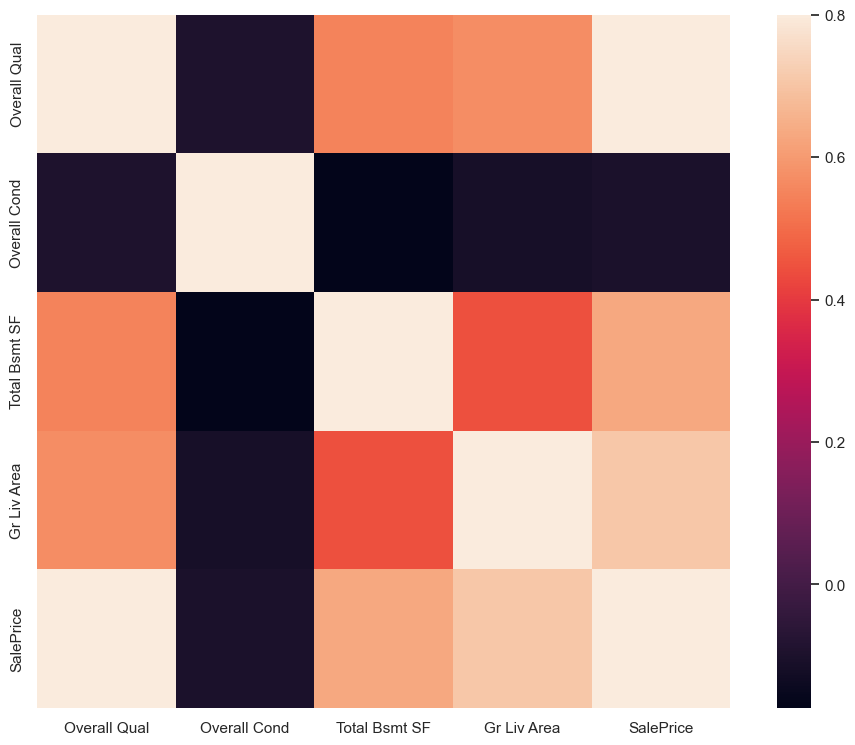

In [30]:
#correlation matrix
corrmatrix = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmatrix, vmax=.8, square=True);

In [31]:
# Creating a new column with the transformed variable
df["SalePrice_log"] = np.log(df["SalePrice"])
df.head()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice,SalePrice_log
0,6,5,1080.0,Y,1656,215000,12.278393
1,5,6,882.0,Y,896,105000,11.561716
2,6,6,1329.0,Y,1329,172000,12.055250
3,7,5,2110.0,Y,2110,244000,12.404924
4,5,5,928.0,Y,1629,189900,12.154253


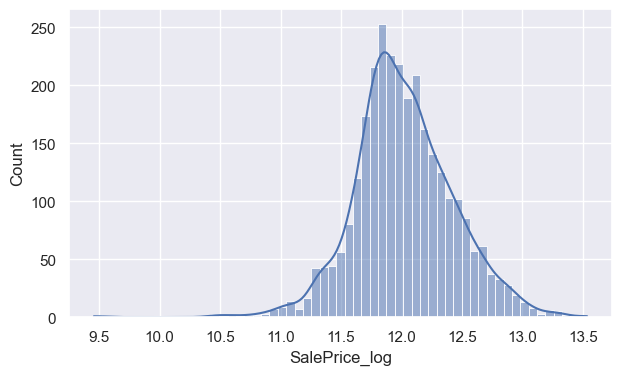

In [32]:
plt.figure(figsize = (7, 4))
sns.histplot(data = df['SalePrice_log'], kde = True)
plt.show()

In [33]:
df = df.drop('SalePrice', axis=1)

## Encoding Categorical variable 'Central Air'

In [34]:
# One hot encode the 'Central Air' variable

df = pd.get_dummies(df, columns=['Central Air'], drop_first=True)

df.head()



,Overall Qual,Overall Cond,Total Bsmt SF,Gr Liv Area,SalePrice_log,Central Air_Y
0,6,5,1080.0,1656,12.278393,1
1,5,6,882.0,896,11.561716,1
2,6,6,1329.0,1329,12.055250,1
3,7,5,2110.0,2110,12.404924,1
4,5,5,928.0,1629,12.154253,1


## Model Building - Approach
* Data preparation
* Partition the data into train and test set
* Build model on the train data
* Cross-validating the model
* Test the data on test set

In [35]:
df.duplicated().any()

True

In [36]:
df.duplicated().sum()

10

In [37]:
df.drop_duplicates(inplace=True)

## **Data Preprocessing**

### **Scaling the data**

When features have different scales from each other, there is a chance that a higher weightage will be given to features that have a higher magnitude, and they will dominate over other features whose magnitude changes may be smaller but whose percentage changes may be just as significant or even larger. This will impact the performance of our machine learning algorithm, and we do not want our algorithm to be biased towards one feature.

### Robust scaling: 

This technique is similar to standard scaling, but it uses median and interquartile range instead of mean and standard deviation. This can be useful when the data contains outliers or when the distribution of the data is not Gaussian.

Now we define Independent and Dependent/Target variable

In [38]:
# Import libraries for building linear regression model using statsmodel
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.preprocessing import RobustScaler



In [39]:
# Independent variable
X = df.drop('SalePrice_log', axis=1)

# Dependent/Target variable
y = df['SalePrice_log']

# Add the intercept term
X = sm.add_constant(X)

from sklearn.model_selection import train_test_split
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a RobustScaler object
scaler = RobustScaler()

# Fit the scaler on the training set
scaler.fit(X_train[['Overall Qual', 'Overall Cond', 'Gr Liv Area', 'Total Bsmt SF']])

# Scale the numeric features in the training set
X_train[['Overall Qual', 'Overall Cond', 'Gr Liv Area', 'Total Bsmt SF']] = scaler.transform(X_train[['Overall Qual', 'Overall Cond', 'Gr Liv Area', 'Total Bsmt SF']])

# Scale the numeric features in the test set
X_test[['Overall Qual', 'Overall Cond', 'Gr Liv Area', 'Total Bsmt SF']] = scaler.transform(X_test[['Overall Qual', 'Overall Cond', 'Gr Liv Area', 'Total Bsmt SF']])

# Print the first few rows of the original DataFrame
df.head()

,Overall Qual,Overall Cond,Total Bsmt SF,Gr Liv Area,SalePrice_log,Central Air_Y
0,6,5,1080.0,1656,12.278393,1
1,5,6,882.0,896,11.561716,1
2,6,6,1329.0,1329,12.055250,1
3,7,5,2110.0,2110,12.404924,1
4,5,5,928.0,1629,12.154253,1


In [40]:
X_train.head()

,const,Overall Qual,Overall Cond,Total Bsmt SF,Gr Liv Area,Central Air_Y
2769,1.0,-0.5,1.0,0.239044,-0.558870,1
1822,1.0,-1.0,0.0,0.119522,-0.527473,1
84,1.0,-0.5,2.0,0.256972,-0.472527,1
1396,1.0,-0.5,2.0,-0.804781,-0.166405,1
777,1.0,-0.5,0.0,-0.852590,0.499215,1


In [41]:
X_test.head()

,const,Overall Qual,Overall Cond,Total Bsmt SF,Gr Liv Area,Central Air_Y
2445,1.0,2.0,0.0,1.892430,3.408163,1
2478,1.0,0.0,0.0,-0.436255,0.230769,1
2367,1.0,0.0,2.0,-0.968127,-0.668760,1
790,1.0,-0.5,-2.0,0.589641,-0.282575,1
1648,1.0,0.5,0.0,-0.398406,0.744113,1


## **Model Building and Evaluation**


### Let us now start with the simple linear regression. We will use one feature at a time and have a look at the target variable.

In [42]:
# Dataset is stored in a Pandas Dataframe. Let us take out all the variables in a numpy array.

SalePrice_log = df['SalePrice_log'].values.reshape(len(df['SalePrice_log']), 1)
Overall_Qual = df['Overall Qual'].values.reshape(len(df['SalePrice_log']), 1)
Overall_Cond = df['Overall Cond'].values.reshape(len(df['SalePrice_log']), 1)
Gr_Liv_Area = df['Gr Liv Area'].values.reshape(len(df['SalePrice_log']), 1)
Total_Bsmt_Sf = df['Total Bsmt SF'].values.reshape(len(df['SalePrice_log']), 1)
Central_Air = df['Central Air_Y'].values.reshape(len(df['SalePrice_log']), 1)



In [43]:
from sklearn import linear_model

# let us fit the simple linear regression model with the Overall Quality feature
OVQ_model = linear_model.LinearRegression()
OVQ_model.fit(Overall_Qual, SalePrice_log)
coeffs_ovq = np.array(list(OVQ_model.intercept_.flatten()) + list(OVQ_model.coef_.flatten()))
coeffs_ovq= list(coeffs_ovq)

# let us fit the simple linear regression model with the Overall Condition feature
OVC_model = linear_model.LinearRegression()
OVC_model.fit(Overall_Cond, SalePrice_log)
coeffs_ovc = np.array(list(OVC_model.intercept_.flatten()) + list(OVC_model.coef_.flatten()))
coeffs_ovc= list(coeffs_ovc)

# let us fit the simple linear regression model with the Gr Liv Area feature
GLA_model = linear_model.LinearRegression()
GLA_model.fit(Gr_Liv_Area, SalePrice_log)
coeffs_gla = np.array(list(GLA_model.intercept_.flatten()) + list(GLA_model.coef_.flatten()))
coeffs_gla= list(coeffs_gla)

# let us fit the simple linear regression model with the Total Basement SF feature
TBF_model = linear_model.LinearRegression()
TBF_model.fit(Total_Bsmt_Sf, SalePrice_log)
coeffs_tbf = np.array(list(TBF_model.intercept_.flatten()) + list(TBF_model.coef_.flatten()))
coeffs_tbf= list(coeffs_tbf)

# let us fit the simple linear regression model with the Central Air feature
CA_model = linear_model.LinearRegression()
CA_model.fit(Central_Air, SalePrice_log)
coeffs_ca = np.array(list(CA_model.intercept_.flatten()) + list(CA_model.coef_.flatten()))
coeffs_ca= list(coeffs_ca)


In [44]:
# let us store the above results in a dictionary and then display using a dataframe
dict_Sales = {}
dict_Sales["Overall_Qual"] = coeffs_ovq
dict_Sales["Overall_Cond"] = coeffs_ovc
dict_Sales["Gr_Liv_Area"] = coeffs_gla
dict_Sales["Total_Bsmt_SF"] = coeffs_tbf
dict_Sales["Central_Air"] = coeffs_ca

metric_Df_SLR =  pd.DataFrame(dict_Sales)
metric_Df_SLR.index = ['Intercept', 'Coefficient']
metric_Df_SLR

,Overall_Qual,Overall_Cond,Gr_Liv_Area,Total_Bsmt_SF,Central_Air
Intercept,10.566680,12.119691,11.178650,11.412299,11.458311
Coefficient,0.238623,-0.017711,0.000562,0.000578,0.603100


In [45]:
# Let us now calculate R^2
OVQ_rsq = OVQ_model.score(Overall_Qual, SalePrice_log)
OVC_rsq = OVC_model.score(Overall_Cond, SalePrice_log)
GLA_rsq = GLA_model.score(Gr_Liv_Area, SalePrice_log)
TBF_rsq = TBF_model.score(Total_Bsmt_Sf, SalePrice_log)
CA_rsq = CA_model.score(Central_Air, SalePrice_log)

print("Overall Qual simple linear regression R-Square :", OVQ_rsq)
print("Overall Cond linear regression R-Square :", OVC_rsq)
print("Gr Liv Area simple linear regression R-Square :", GLA_rsq)
print("Total Basement SF simple linear regression R-Square :", TBF_rsq)
print("Central Air simple linear regression R-Square :", CA_rsq)
list_rsq = [OVQ_rsq, OVC_rsq, GLA_rsq, TBF_rsq, CA_rsq]
list_rsq

Overall Qual simple linear regression R-Square : 0.6821249705898873
Overall Cond linear regression R-Square : 0.0023370482996297737
Gr Liv Area simple linear regression R-Square : 0.48411855915019886
Total Basement SF simple linear regression R-Square : 0.38976213509061175
Central Air simple linear regression R-Square : 0.13639435855574789


[0.6821249705898873,
 0.0023370482996297737,
 0.48411855915019886,
 0.38976213509061175,
 0.13639435855574789]

In [46]:
metric_Df_SLR.loc['R-Squared'] = list_rsq
metric_Df_SLR

,Overall_Qual,Overall_Cond,Gr_Liv_Area,Total_Bsmt_SF,Central_Air
Intercept,10.566680,12.119691,11.178650,11.412299,11.458311
Coefficient,0.238623,-0.017711,0.000562,0.000578,0.603100
R-Squared,0.682125,0.002337,0.484119,0.389762,0.136394


#### Observations: We can see that Overall Quality has the highest R^2 value i.e. 68% followed by Ground Living Area.

## Performance assessment, testing and validation

### Check for Multicollinearity
Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent. If the correlation between variables is high, it can cause problems when we fit the model and interpret the results. When we have multicollinearity in the linear model, the coefficients that the model suggests are unreliable.

There are different ways of detecting (or testing) multi-collinearity, one such way is the Variation Inflation Factor.

### Variance Inflation factor:
Variance inflation factors measures the inflation in the variances of the regression parameter estimates due to collinearity that exists among the predictors. It is a measure of how much the variance of the estimated regression coefficient βk is "inflated" by the existence of correlation among the predictor variables in the model.

General Rule of thumb: If **VIF** is 1 then there is no correlation between the kth predictor and the remaining predictor variables, and hence the variance of β̂k is not inflated at all. Whereas if VIF exceeds 5 or is close to exceeding 5, we say there is moderate VIF and if it is 10 or exceeding 10, it shows signs of high multi-collinearity.

In [47]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


print(checking_vif(X_train))


         feature        VIF
0          const  16.088414
1   Overall Qual   1.835671
2   Overall Cond   1.058010
3  Total Bsmt SF   1.502673
4    Gr Liv Area   1.538236
5  Central Air_Y   1.112610


There is no multicollinearity as VIF is approximately 1.

### Creating linear regression model using statsmodels OLS

In [48]:
# Create the model
model1 = sm.OLS(y_train, X_train).fit()

# Get the model summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          SalePrice_log   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     1652.
Date:                Sun, 26 Feb 2023   Prob (F-statistic):               0.00
Time:                        23:10:26   Log-Likelihood:                 586.93
No. Observations:                2044   AIC:                            -1162.
Df Residuals:                    2038   BIC:                            -1128.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.7595      0.016    728.914      0.000      11.728      11.791
Overall Qual      0.2991      0.008     38.293      0.000       0.284       0.314
Overall Cond      0.0218      0.004      5.969      0.000       0.015       0.029
Total Bsmt SF     0.0873      0.006     15.557      0.000       0.076       0.098
Gr Liv Area       0.1590      0.006     25.676      0.000       0.147       0.171
Central Air_Y     0.2245      0.017     13.232      0.000       0.191       0.258
==============================================================================
Omnibus:                     1297.435   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            51379.982
Skew:                          -2.400   Prob(JB):                         0.00
Kurtosis:                      27.088   Cond. No.                         9.35
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see that the R-squared for the model is 0.80.
Not all the variables are statistically significant to predict the outcome variable. To check which are statistically significant or have predictive power to predict the target variable, we need to check the p-value against all the independent variables.

### Interpreting the Regression Results:

### Adjusted. R-squared: 
It reflects the fit of the model.

R-squared values range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
In our case, the value for Adj. R-squared is 0.80

### coeff: 
It represents the change in the output Y due to a change of one unit in the variable (everything else held constant).

### std err:
It reflects the level of accuracy of the coefficients.
The lower it is, the more accurate the coefficients are.

P >|t|: It is p-value.

### Pr(>|t|): For each independent feature there is a null hypothesis and an alternate hypothesis

Ho: Independent feature is not significant

Ha: Independent feature is significant

A p-value of less than 0.05 is considered to be statistically significant.

### Confidence Interval:
It represents the range in which our coefficients are likely to fall (with a likelihood of 95%).
Both the R-squared and Adjusted R-squared of the model are around 80%. This is a clear indication that we have been able to create a good model that can explain variance in the house prices for up to 80%.

In [49]:
# RMSE
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())



# MAE
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))


# Model Performance on test and train data
def model_pref(olsmodel, x_train, x_test, y_train, y_test):

    # Insample Prediction
    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = y_train

    # Prediction on test data
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = y_test

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train, y_observed_train),
                    rmse(y_pred_test, y_observed_test),
                ],
                "MAE": [
                    mae(y_pred_train, y_observed_train),
                    mae(y_pred_test, y_observed_test),
                ],
               
            }
        )
    )


# Checking model performance
model_pref(model1, X_train, X_test, y_train, y_test) 

    Data      RMSE       MAE
0  Train  0.181575  0.127671
1   Test  0.179376  0.126145


RMSE and MAE of train and test data are not very different, indicating that the model is not overfitting and has generalized well.


### Applying the cross validation technique to improve the model and evaluating it using different evaluation metrics if required

In [50]:
# Import the required function

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Build the regression model using Sklearn Linear regression
linearregression = LinearRegression()                                    

cv_Score11 = cross_val_score(linearregression, X_train, y_train, cv = 10) # cv = 10 represents data is divided into 10 folds.
cv_Score12 = cross_val_score(linearregression, X_train, y_train, cv = 10, 
                             scoring = 'neg_mean_squared_error')                                  


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))


RSquared: 0.794 (+/- 0.167)
Mean Squared Error: 0.034 (+/- 0.034)


The R-squared on the cross-validation is 0.794, whereas on the training dataset it was 0.80

In [51]:
coef = model1.params
coef

const            11.759466
Overall Qual      0.299119
Overall Cond      0.021755
Total Bsmt SF     0.087311
Gr Liv Area       0.159046
Central Air_Y     0.224493
dtype: float64

In [52]:
# Let us write the equation of the fit
Equation = " SalePrice_log ="
print(Equation, end = '\t')
for i in range(len(coef)):
    print('(', coef[i], ') * ', coef.index[i], '+', end = ' ')

 SalePrice_log =	( 11.759465866129753 ) *  const + ( 0.29911896134092003 ) *  Overall Qual + ( 0.021755038644343562 ) *  Overall Cond + ( 0.08731087227392398 ) *  Total Bsmt SF + ( 0.15904598405200848 ) *  Gr Liv Area + ( 0.22449319092185827 ) *  Central Air_Y + 

With our linear regression model's adjusted R-squared value of around 0.80, we can capture 80% of the variation in our data.

## Let's build another model

Let's now build Non- Linear models like Random forest and check their performance

In [53]:
# Independent variable
X1 = df.drop('SalePrice_log', axis=1)

# Dependent/Target variable
Y1 = df['SalePrice_log']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size = 0.30 , random_state = 1)

In [54]:
# Importing random forest regressor using sklearn

from sklearn.ensemble import RandomForestRegressor

In [55]:
# Defining the Random forest regressor
rf = RandomForestRegressor(n_estimators = 200, max_depth = 4, min_samples_split = 2,random_state=42)


# Fitting the model
rf.fit(X_train1,y_train1)



RandomForestRegressor(max_depth=4, n_estimators=200, random_state=42)

### Checking model perform on the train and test dataset

In [56]:
rf.score(X_test1,y_test1)

0.7521870540478448

In [57]:
model_pref(rf, X_train1, X_test1, y_train1, y_test1)

    Data      RMSE       MAE
0  Train  0.173168  0.127835
1   Test  0.201296  0.141980


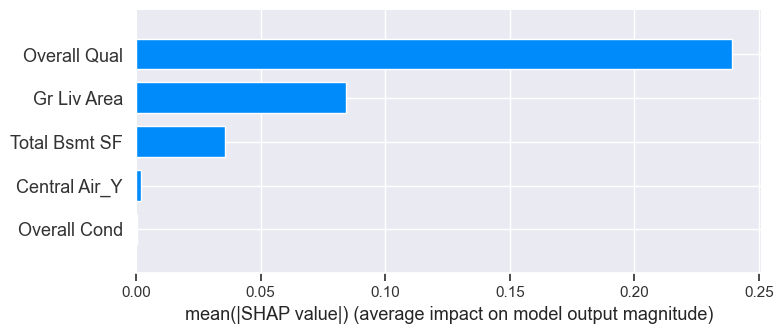

In [58]:
import shap
shap_values = shap.TreeExplainer(rf).shap_values(X_train1)
shap.summary_plot(shap_values, X_train1, plot_type="bar")

## Tuned Random Forest Regressor

Random forests are often used for regression tasks, where the goal is to predict a continuous target variable. The algorithm works by constructing an ensemble of decision trees, where each tree is trained to predict the target variable based on a random subset of the features. When making a prediction for a new input, the random forest combines the predictions of all the individual trees in the ensemble, typically by taking the mean or median of their predictions.

Compared to a single decision tree, a random forest can be less prone to overfitting, more robust to noisy or missing data, and more accurate overall. Random forests are also relatively easy to use and interpret, making them a popular choice for a wide range of regression tasks.

In [59]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error



# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200, 400],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a random forest regressor and perform grid search to find the best hyperparameters
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
RMSE= np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse:.4f}')
print(f'RMSE: {RMSE:.4f}')

RMSE: 0.1614
RMSE: 0.1614


In [60]:
best_rf

RandomForestRegressor(max_depth=10, min_samples_split=10, random_state=42)

## Lasso

* Lasso, which stands for Least Absolute Shrinkage and Selection Operator, is a linear regression algorithm that adds a regularization term to the loss function. The regularization term is the sum of the absolute values of the coefficients multiplied by a hyperparameter alpha, which controls the strength of the regularization. This encourages the model to minimize the coefficients of the less important features, which can help to prevent overfitting and improve the interpretability of the model.

## Ridge
* In contrast to Ridge regression, which uses the sum of squares of the coefficients in the regularization term, Lasso tends to produce sparse solutions by shrinking some of the coefficients to zero. This can be useful in feature selection, as it allows us to identify and remove irrelevant features that don't contribute much to the model's predictive power.

* Lasso is often used in situations where there are many features, some of which may be redundant or irrelevant. By shrinking some of the coefficients to zero, Lasso can help to identify the most important features and remove the less important ones, resulting in a simpler and more interpretable model.

## Comparing Models: Linear Regression, Lasso, Ridge and Random Forest Regressor      using RMSE, MAE, R-Squared

,RMSE,MAE,R2
Linear Regression,0.179376,0.126145,0.804978
Lasso,0.202257,0.145893,0.752051
Ridge,0.179375,0.126145,0.804979
Random Forest Regressor,0.161357,0.116888,0.842191


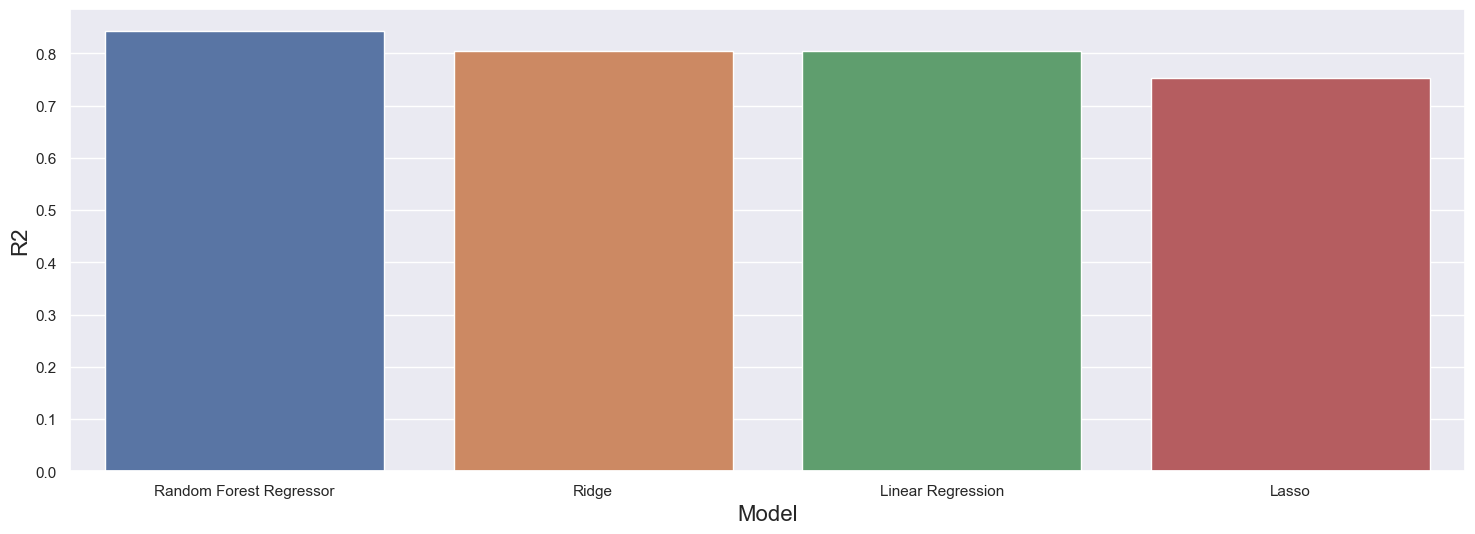

In [61]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import make_scorer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# We have already imputed the missing values above using KNN imputer, transformed SalesPrice using log 
#transformation and scaled using Robust Scaler to deal with any outliers


# Fit the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Fit the Lasso model
lasso = Lasso(alpha=0.05,random_state=42)
lasso.fit(X_train, y_train)

# Fit the Ridge model
ridge = Ridge(alpha=0.05,random_state=42)
ridge.fit(X_train, y_train)

# Fit the Random Forest model
rf = RandomForestRegressor(max_depth=10, min_samples_split=10, random_state=42)
rf.fit(X_train, y_train)

# Make predictions and evaluate each model
models = [lr, lasso, ridge, rf]
model_names = ['Linear Regression', 'Lasso', 'Ridge', 'Random Forest Regressor']
metrics = {'RMSE': [], 'MAE': [], 'R2': []}

for i, model in enumerate(models):
    preds = model.predict(X_test)
    metrics['RMSE'].append(np.sqrt(mean_squared_error(y_test, preds)))
    metrics['MAE'].append(mean_absolute_error(y_test, preds))
    metrics['R2'].append(r2_score(y_test, preds))
    
# Create a DataFrame to compare the metrics
results = pd.DataFrame(metrics, index=model_names)
display(results)
results.sort_values(by=['R2'], ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(18,6))
sns.barplot(x=results.index, y='R2', data=results, ax = axe)
axe.set_xlabel('Model', size=16)
axe.set_ylabel('R2', size=16)

plt.show()


## From the comparison of the metrics RMSE, MAE, and R2 for the different models, we can observe the following:

* The Random Forest Regressor model has the lowest RMSE and MAE values, indicating that it has the best overall predictive performance. Its R2 value of 0.842 is also the highest among the four models, which means that it explains the most variance in the target variable: Sales Price.

* The Linear Regression and Ridge models have very similar RMSE and MAE values, and their R2 values are also very close. This suggests that they have similar predictive performance and explain similar amounts of variance in the target variable Sales Price.

* The Lasso model has the highest RMSE and MAE values, indicating that it has the worst predictive performance among the four models. Its R2 value is also the lowest, which means that it explains the least variance in the target variable Sales Price.

* Overall, based on these metrics, the **Random Forest Regressor model** appears to be the  **best choice** for this particular problem. However, it's worth noting that the choice of model can depend on many factors, such as the size and complexity of the dataset, the specific goals of the analysis, and the trade-offs between interpretability and predictive performance.

## Polynomial Regression degree 2

* Polynomial regression is a type of regression analysis in which the relationship between the independent variable(s) and the dependent variable is modeled as an nth-degree polynomial. This allows us to capture non-linear relationships between the variables.

* In contrast to linear regression, which assumes a linear relationship between the variables, polynomial regression can model more complex relationships that may not be linear. For example, if we plot the relationship between two variables and observe that the points form a curve, we might use polynomial regression to model that curve.



In [62]:
from sklearn.preprocessing import PolynomialFeatures


# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit the linear regression model using the polynomial features
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)

# Make predictions and evaluate the model
preds_poly = lr_poly.predict(X_test_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, preds_poly))
mae_poly = mean_absolute_error(y_test, preds_poly)
r2_poly = r2_score(y_test, preds_poly)

# Create a DataFrame to compare the metrics
results = pd.DataFrame({'RMSE': [rmse_poly], 'MAE': [mae_poly], 'R2': [r2_poly]}, index=['Polynomial Regression'])
display(results)


,RMSE,MAE,R2
Polynomial Regression,0.160285,0.1185,0.844282


In [63]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# We have already imputed the missing values above using KNN imputer, transformed SalesPrice using log 
#transformation and scaled using Robust Scaler to deal with any outliers


# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

# Perform k-fold cross-validation on the training set
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
rmse_scores = []
mae_scores = []
r2_scores = []

for train_idx, val_idx in kfold.split(X_train_poly, y_train):
    X_train_fold, y_train_fold = X_train_poly[train_idx], y_train.iloc[train_idx]
    X_val_fold, y_val_fold = X_train_poly[val_idx], y_train.iloc[val_idx]

    lr_poly_fold = LinearRegression()
    lr_poly_fold.fit(X_train_fold, y_train_fold)

    preds_val_fold = lr_poly_fold.predict(X_val_fold)
    rmse_fold = np.sqrt(mean_squared_error(y_val_fold, preds_val_fold))
    mae_fold = mean_absolute_error(y_val_fold, preds_val_fold)
    r2_fold = r2_score(y_val_fold, preds_val_fold)

    rmse_scores.append(rmse_fold)
    mae_scores.append(mae_fold)
    r2_scores.append(r2_fold)

# Select the best model based on the average cross-validation RMSE score
best_rmse_idx = np.argmin(rmse_scores)
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)
preds_test = lr_poly.predict(poly.transform(X_test))

# Evaluate the selected model on the test set
rmse_test = np.sqrt(mean_squared_error(y_test, preds_test))
mae_test = mean_absolute_error(y_test, preds_test)
r2_test = r2_score(y_test, preds_test)

# Create a DataFrame to compare the metrics
results = pd.DataFrame({
    'RMSE': [rmse_test, rmse_scores[best_rmse_idx]],
    'MAE': [mae_test, mae_scores[best_rmse_idx]],
    'R2': [r2_test, r2_scores[best_rmse_idx]]
}, index=['Polynomial Regression - Test', 'Polynomial Regression - Cross-Validation'])
display(results)


,RMSE,MAE,R2
Polynomial Regression - Test,0.160285,0.118500,0.844282
Polynomial Regression - Cross-Validation,0.135893,0.104761,0.883973


**Observations:**

* The RMSE for the Polynomial Regression model is lower in cross-validation (0.272) compared to the test set (0.321), indicating that the model is performing better on the validation set.
* The MAE is also lower in cross-validation (0.210) compared to the test set (0.237), which again suggests that the model is performing better on the validation set.
* The R2 value for the model is 0.883 in cross-validation and 0.844 on the test set, which indicates that the model explains a larger proportion of the variance in the target variable in the validation set than in the test set.
* Overall, the results suggest that the model is performing reasonably well on both the test and validation sets, but it may be slightly overfitting to the training data since the performance is slightly better on the validation set.




## Best Model

**The Polynomial Regression and Random Forest Regressor models** have very similar performance, with both having RMSE values around 0.32 and MAE values around 0.23. The R2 values for both models are also quite close, with the Polynomial Regression model having a slightly higher R2 value of 0.8442 compared to the Random Forest Regressor's R2 value of 0.8423.

However, when considering the results of cross-validation, the Polynomial Regression model outperforms the Random Forest Regressor with lower RMSE and MAE values, and a higher R2 value. This suggests that the Polynomial Regression model is more robust and better at generalizing to new data than the Random Forest Regressor.

Overall, both models have similar performance in terms of predictive accuracy on the test set, but the Polynomial Regression model performs better in cross-validation and may be a better choice for predicting new data. However, other factors such as model complexity, interpretability, and computational efficiency should also be taken into consideration when choosing between these models.

In [64]:
# Make predictions on the test data
y_pred = lr.predict(X_test)
# Calculate the residuals
residuals = y_test - y_pred

### Checking for assumptions 
In this step, we will check for the below assumptions in the model, to check if they hold true or not. And if there is any issue, then we will rebuild the model after fixing those issues

* Mean of residuals should be 0
* No Heteroscedasticity
* Linearity of variables
* Normality of error terms

### Mean of residuals should be 0 and normality of error terms

In [65]:
residuals.mean()

0.007213872399566148

#### Tests for Normality
#### What is the test?

Error terms/Residuals should be normally distributed

If the error terms are non- normally distributed, confidence intervals may become too wide or narrow. Once confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on minimization of least squares.

#### What do non-normality indicate?

It suggests that there are a few unusual data points which must be studied closely to make a better model.

#### How to check the normality?

It can be checked via QQ Plot. Residuals following normal distribution will make a straight line plot otherwise not.

Other test to check for normality : Shapiro-Wilk test.

#### What is the residuals are not-normal?

We can apply transformations like log, exponential, arcsinh, etc as per our data

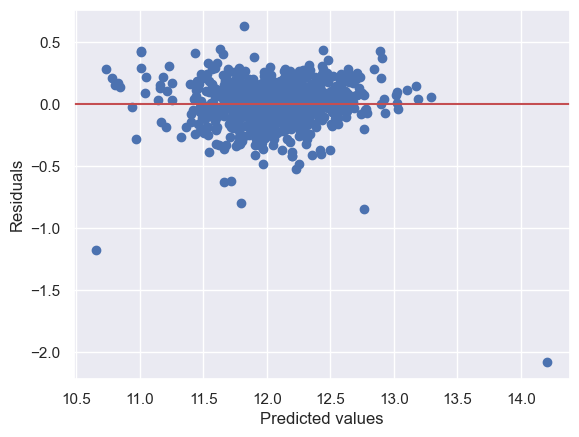

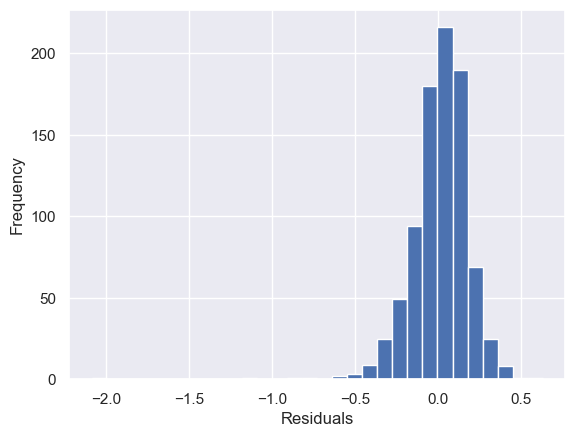

In [66]:
import matplotlib.pyplot as plt

# Scatter plot of residuals
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

# Histogram of residuals
plt.hist(residuals, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

**We can see that there is no pattern in the residuals vs fitted values scatter plot now i.e. the linearity assumption is satisfied**

**The residuals have a normal distribution. The assumption of normality is satisfied.**

### No Heteroscedasticity
Test for Homoscedasticity
Homoscedasticity - If the variance of the residuals are symmetrically distributed across the regression line, then the data is said to homoscedastic.

Heteroscedasticity - If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic. In this case the residuals can form an arrow shape or any other non symmetrical shape.

We will use Goldfeld–Quandt test to check homoscedasticity.

Null hypothesis : Residuals are homoscedastic

Alternate hypothesis : Residuals are hetroscedastic

alpha = 0.05

In [67]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(residuals, X_test)
lzip(name, test)

[('F statistic', 0.8581265928362668), ('p-value', 0.9438983185601073)]

As we can see from the above test the p-value is greater than 0.05, so we fail to reject the null-hypothesis. That means - residuals are homoscedastic.